### Предсказание отношения студентов к внеурочной работе

В задаче используется датасет из ноутбука career_orientation_test. Данные были собраны в ходе курсовой работы "Восприятие soft skills  и  hard skills как факторов развития карьеры студентами ВУЗов г. Москвы".
В этой задаче будет построена модель логистической регрессии, где бинарная переменная ex_hours (1 - готов работать внеурочно, 0 - не готов) будет выступать в роли зависимой. Все остальные переменные (кроме блока ex_hours) будут включены в модель как независимые переменные.
В конце пять переменных, оказывающих наибольшее влияние на вероятность отнесения респондента к тому или иному классу будут проинтерпретированы содержательно.

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('students.csv', sep = ';', na_values = [' ', '-'])

In [3]:
df

,city,uni,field_study,year,exper_1,exper_2,exper_3,exper_4,time_exp,goal,...,enunciate_2,psyc_know_2,creative_know_2,work_life_know_2,crit_think_know_2,game_theory_2,comp_know,my_prof_2,gender,age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,5.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
4,1.0,1.0,4.0,3.0,0.0,0.0,1.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,1.0,3.0,1.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.0
508,1.0,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1.0,1.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,20.0


Отбираем анкеты, в которых дан ответ на вопрос о готовности работать внеурочно.

In [4]:
df = df.dropna(subset = ['ex_hours'])

In [5]:
df

,city,uni,field_study,year,exper_1,exper_2,exper_3,exper_4,time_exp,goal,...,enunciate_2,psyc_know_2,creative_know_2,work_life_know_2,crit_think_know_2,game_theory_2,comp_know,my_prof_2,gender,age
3,1.0,1.0,5.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0
4,1.0,1.0,4.0,3.0,0.0,0.0,1.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,5.0,7.0,1.0,0.0,0.0,0.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,23.0
7,1.0,1.0,5.0,8.0,1.0,1.0,0.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,25.0
8,1.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.0
507,1.0,3.0,1.0,6.0,1.0,0.0,1.0,0.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.0
508,1.0,1.0,5.0,4.0,1.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1.0,1.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,20.0


Бинаризируем категориальные переменные.

In [6]:
categorical = ['city', 'uni', 'field_study', 'year', 'time_exp', 'goal', 'org', 'org_2', 'career_start', 'education_start', 'gender']

In [7]:
df = pd.get_dummies(df, columns = categorical)

Оставшиеся пропущенные значения заполняем 0 (нет ответа)

In [8]:
df = df.fillna(0)

In [9]:
df

,exper_1,exper_2,exper_3,exper_4,salary_expect,salary_size,ex_hours,ex_hours_1,ex_hours_2,ex_hours_3,...,career_start_2.0,career_start_3.0,education_start_1.0,education_start_2.0,education_start_3.0,education_start_4.0,education_start_5.0,gender_1.0,gender_2.0,gender_3.0
3,0.0,1.0,1.0,0.0,1000.0,1.0,1.0,0.0,0.0,1.0,...,0,1,0,1,0,0,0,1,0,0
4,0.0,0.0,1.0,0.0,1000.0,2.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
5,1.0,0.0,0.0,0.0,450.0,1.0,1.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
7,1.0,1.0,0.0,0.0,150.0,3.0,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
8,0.0,1.0,1.0,0.0,300.0,2.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1.0,0.0,0.0,0.0,120.0,2.0,1.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
507,1.0,0.0,1.0,0.0,300.0,2.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
508,1.0,0.0,0.0,0.0,150.0,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
509,1.0,0.0,1.0,0.0,200.0,2.0,1.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0


### Построение модели логистической регрессии

In [10]:
y = df['ex_hours'].map({1:1, 2:0})

In [40]:
X = df.drop(columns = df.loc[:, 'ex_hours':'ex_hours_5'].columns)

Так как изначально в модель включается более 100 зависимых переменных, большинство из которых - бинарные, а значит, имеют ограниченный потенциал для содержательной интерпретации, при построении модели будет использована L1 регуляризация для отбора наиболее информативных признаков.

In [41]:
from sklearn.linear_model import LogisticRegressionCV

In [147]:
alphas = np.arange(1, 100, 10)
model = LogisticRegressionCV(Cs = alphas, penalty = 'l1', solver = 'liblinear')
model.fit(X, y)

LogisticRegressionCV(Cs=array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                     penalty='l1', solver='liblinear')

Максимальное значение средней accuracy достигается при минимальной С.

In [148]:
np.max(model.scores_[1].mean(axis = 0))

0.6956521739130435

In [149]:
model.C_

array([1])

Text(0, 0.5, 'mean accuracy')

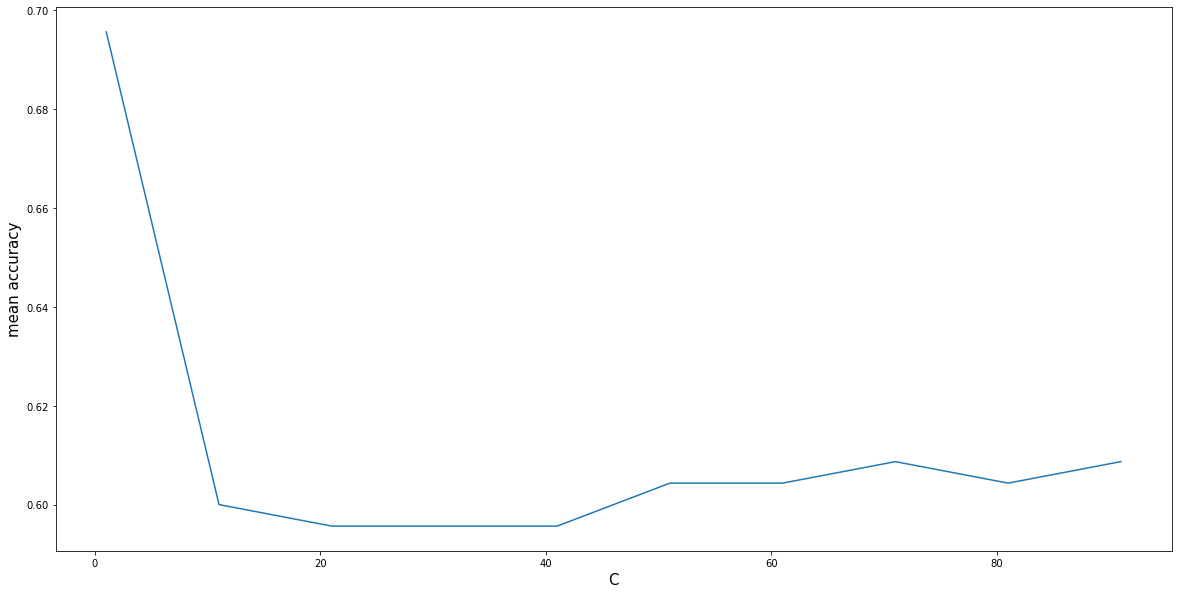

In [150]:
xs = model.Cs_
ys = model.scores_[1].mean(axis = 0)
plt.figure(figsize=(20, 10))
plt.plot(xs, ys)
plt.xlabel("C", fontsize=15)
plt.ylabel("mean accuracy", fontsize=15)

In [151]:
indx = pd.DataFrame({'feature': np.array(X.columns), 'coefs': model.coef_.reshape(-1,)})

In [155]:
indx.loc[np.nonzero(model.coef_)[1]].sort_values('coefs')

,feature,coefs
78,field_study_3.0,-1.455781
81,field_study_6.0,-1.324196
22,work_life_balance,-0.543130
89,year_8.0,-0.538493
31,intern_any,-0.374960
93,goal_1.0,-0.334813
28,comp,-0.304989
38,leader,-0.266076
101,org_2_1.0,-0.210107
20,deadlines,-0.188432


Наибольшее отрицательное влияние на вероятность быть склонным к переработкам оказывают переменные: 
* **field_study_3.0** - студенты естественно-научных специальностей
* **field_study_6.0** - студенты социально-гуманитарных специальностей
* **work_life_balance** - высокая оценка важности 

Наибольшеее положительное влияние оказывают переменные: 
* **uni_13.0** - студенты из _других_ ВУЗов. Учитывая специфику выборки, можно предположить, что это студенты не из ВШЭ.
* **psych_litr** - чтение литературы по психологии и саморазвитию
* **org_2_5.0** - размер организации не важен

К сожалению, результаты полученной логистической регрессии трудно осмысленно интерпретировать. Отчасти ее плохое качество можно объяснить малой выборкой класса 0 - студентов, не готовых к переработкам, из-за чего классы несбалансированы. Модель стремится стать константной. 